# Introduction
We will create our own dataset and expand the data.



In [363]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import re

# Init dataset

In [364]:
import glob 

path = './training' 
img_list = glob.glob(path + '/*' + ".jpeg")
img_list

['./training/cat0.jpeg',
 './training/cat1.jpeg',
 './training/dog1.jpeg',
 './training/dog0.jpeg',
 './training/cat4.jpeg',
 './training/dog3.jpeg',
 './training/dog2.jpeg',
 './training/cat2.jpeg',
 './training/dog4.jpeg',
 './training/cat3.jpeg']

# Prep dataset

In [365]:
dog_img_array = np.empty((0,224,224,3))
cat_img_array = np.empty((0,224,224,3))
train_labels = []

for img in img_list:
    if re.search('dog', img):
        dog_img_ = Image.open(img)
        dog_img_ = dog_img_.resize((224, 224))
        dog_img = np.array(dog_img_)
        dog_img = dog_img / 255.
        dog_img = dog_img.reshape((1,224,224,3))
        dog_img_array = np.concatenate([dog_img_array, dog_img], axis = 0)
        dog_img_.close()
        train_labels.append(1)

    if re.search('cat', img):
        cat_img_ = Image.open(img)
        cat_img_ = cat_img_.resize((224, 224))
        cat_img = np.array(cat_img_)
        cat_img = cat_img / 255.
        cat_img = cat_img.reshape((1,224,224,3))
        cat_img_array = np.concatenate([cat_img_array, cat_img], axis = 0)
        cat_img_.close()
        train_labels.append(0)
print('dog_image:{}  cat_image:{}'.format(dog_img_array.shape, cat_img_array.shape))

train_labels = np.array(train_labels)

dog_image:(5, 224, 224, 3)  cat_image:(5, 224, 224, 3)


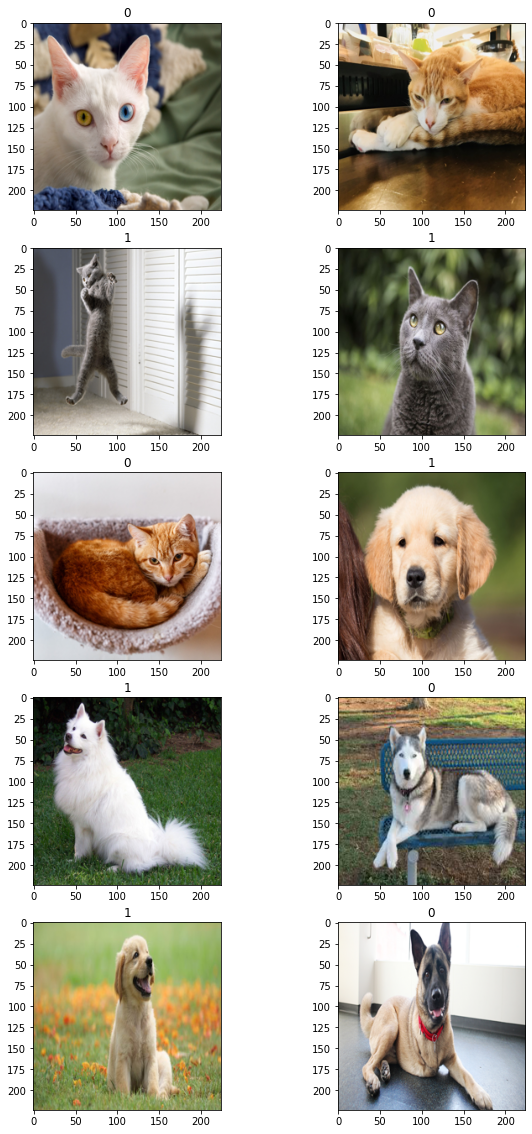

In [366]:
fig = plt.figure(figsize=(10,20))
columns = 2
rows = 5
for i, img in enumerate(np.concatenate((cat_img_array,dog_img_array), axis = 0)):
    ax = fig.add_subplot(rows, columns, i+1)
    ax.set_title(train_labels[i])
    plt.imshow(img)
plt.show()

In [367]:
train_labels = np.concatenate((np.zeros(cat_img_array.shape[0]), np.ones(dog_img_array.shape[0]))).astype(np.int)
train_labels

array([0, 0, 0, 0, 0, 1, 1, 1, 1, 1])

In [368]:
train_images = np.concatenate((cat_img_array,dog_img_array), axis = 0)
train_images.shape

(10, 224, 224, 3)

In [369]:
from sklearn.model_selection import train_test_split
train_images, test_images, train_labels, test_labels = train_test_split(train_images, train_labels, test_size = 0.2, random_state=0)

# Problem 1
Learning classification with self-made dataset

In [370]:
import tensorflow as tf

tf.random.set_seed(3)
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=cat_img_array.shape[1:]),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])

In [371]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [372]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1/1 [==============================] - 0s 345ms/step - loss: 2.2192 - accuracy: 0.1250
Epoch 2/10
1/1 [==============================] - 0s 52ms/step - loss: 12.8013 - accuracy: 0.5000
Epoch 3/10
1/1 [==============================] - 0s 55ms/step - loss: 136.2894 - accuracy: 0.5000
Epoch 4/10
1/1 [==============================] - 0s 54ms/step - loss: 96.5307 - accuracy: 0.5000
Epoch 5/10
1/1 [==============================] - 0s 54ms/step - loss: 1.2438 - accuracy: 0.8750
Epoch 6/10
1/1 [==============================] - 0s 54ms/step - loss: 59.4739 - accuracy: 0.5000
Epoch 7/10
1/1 [==============================] - 0s 56ms/step - loss: 74.5812 - accuracy: 0.5000
Epoch 8/10
1/1 [==============================] - 0s 55ms/step - loss: 38.8116 - accuracy: 0.5000
Epoch 9/10
1/1 [==============================] - 0s 53ms/step - loss: 3.1588 - accuracy: 0.8750
Epoch 10/10
1/1 [==============================] - 0s 54ms/step - loss: 14.1754 - accuracy: 0.6250


### Probability model


In [373]:
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])

In [374]:
class_names = ['Cat', 'Dog']
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

### Train result

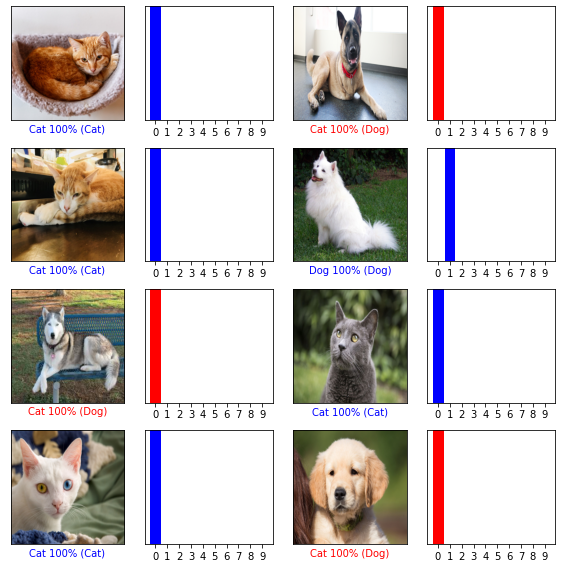

In [375]:
predictions = probability_model.predict(train_images)
num_rows = int(train_images.shape[0] / 2)
num_cols = 2
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], train_labels, train_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], train_labels)
plt.tight_layout()
plt.show()

### Test result

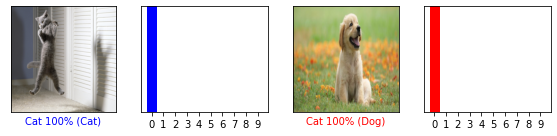

In [376]:
predictions = probability_model.predict(test_images)
num_rows = int(test_images.shape[0] / 2)
num_cols = 2
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

### Conclusion
- Current result is pretty bad :D
- It cant even fit fully on the train set

# Problem 2
Data expansion for classification dataset

In [377]:
import cv2

def plot(img):
  print('shape: ', img.shape)
  plt.imshow(img)
  plt.show()

## Some possible transformations

shape:  (1582, 2048, 3)


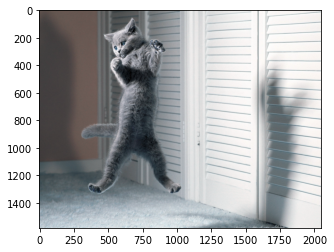

In [378]:
# sample image
img = cv2.imread(img_list[4])
plot(img)

### Resize

shape:  (1582, 4096, 3)


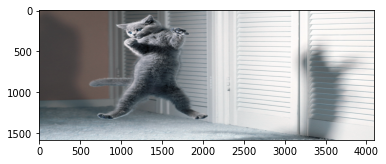

In [379]:
def resize(img, ratio = (2,1)):
  fx,fy = ratio
  img = cv2.resize(img, None, fx = fx, fy = fy)
  return img

plot(resize(img))


shape:  (1582, 2048, 3)


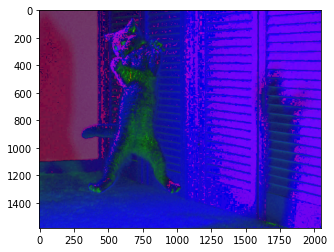

In [380]:
def hsv_color(img):
  return cv2.cvtColor(img, cv2.COLOR_BGR2HSV )
plot(hsv_color(img))

shape:  (1582, 2048, 3)


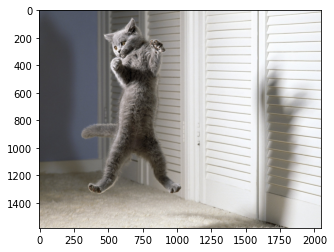

In [381]:
def rgb(img):
  return cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plot(rgb(img))

**Note** red wall changed to blue :D

### Rotation

shape:  (2048, 1582, 3)


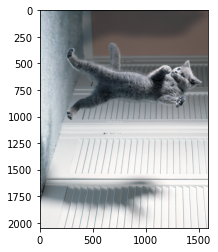

shape:  (1582, 2048, 3)


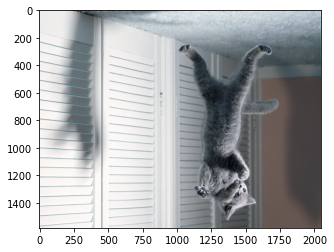

shape:  (2048, 1582, 3)


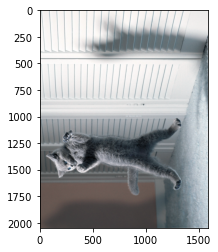

In [382]:
def rotate90(img):
  return cv2.rotate(img, cv2.ROTATE_90_CLOCKWISE)
def rotate180(img):
  return cv2.rotate(img, cv2.ROTATE_180)
def rotate270(img):
  return cv2.rotate(img, cv2.ROTATE_90_COUNTERCLOCKWISE)


plot(rotate90(img))
plot(rotate180(img))
plot(rotate270(img))

In [383]:
def same(img):
  return img

## Let's run these basic transformation
And put them into a `train1` folder

In [384]:
!rm ./train1/*

zsh:1: no matches found: ./train1/*


In [385]:
from functools import partial

resizes = [partial(resize, ratio = ratio) for ratio in [(2,1), (1,2), (0.5,0.5), (2,2)]]
color_changes = [hsv_color, rgb]
rotates = [rotate90, rotate180, rotate270, same]
transformations = resizes + color_changes + rotates

output_path = './train1/'

for i, origin_img_path in enumerate(img_list):
  label = 'cat' if re.search('cat', origin_img_path) else 'dog'
  img = cv2.imread(origin_img_path)
  for j,transformation in enumerate(transformations):
    trans_img = transformation(img)
    cv2.imwrite(output_path + label + str(i) + str(j) + '.jpeg', trans_img)


## Train with new data

In [386]:
import glob 

path = './train1' 
img_list = glob.glob(path + '/*' + ".jpeg")

In [387]:
dog_img_array = np.empty((0,224,224,3))
cat_img_array = np.empty((0,224,224,3))
train_labels = []

for img in img_list:
    if re.search('dog', img):
        dog_img_ = Image.open(img)
        dog_img_ = dog_img_.resize((224, 224))
        dog_img = np.array(dog_img_)
        dog_img = dog_img / 255.
        dog_img = dog_img.reshape((1,224,224,3))
        dog_img_array = np.concatenate([dog_img_array, dog_img], axis = 0)
        dog_img_.close()
        train_labels.append(1)

    if re.search('cat', img):
        cat_img_ = Image.open(img)
        cat_img_ = cat_img_.resize((224, 224))
        cat_img = np.array(cat_img_)
        cat_img = cat_img / 255.
        cat_img = cat_img.reshape((1,224,224,3))
        cat_img_array = np.concatenate([cat_img_array, cat_img], axis = 0)
        cat_img_.close()
        train_labels.append(0)
print('dog_image:{}  cat_image:{}'.format(dog_img_array.shape, cat_img_array.shape))

train_labels = np.array(train_labels)

dog_image:(50, 224, 224, 3)  cat_image:(50, 224, 224, 3)


In [388]:
train_labels = np.concatenate((np.zeros(cat_img_array.shape[0]), np.ones(dog_img_array.shape[0]))).astype(np.int)
train_images = np.concatenate((cat_img_array,dog_img_array), axis = 0)
train_images, test_images, train_labels, test_labels = train_test_split(train_images, train_labels, test_size = 0.2, random_state=0)
print([x.shape for x in [train_images,test_images, train_labels,test_labels]])

[(80, 224, 224, 3), (20, 224, 224, 3), (80,), (20,)]


In [389]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
3/3 [==============================] - 0s 66ms/step - loss: 31.0485 - accuracy: 0.6750
Epoch 2/10
3/3 [==============================] - 0s 63ms/step - loss: 27.8140 - accuracy: 0.6500
Epoch 3/10
3/3 [==============================] - 0s 65ms/step - loss: 16.7390 - accuracy: 0.7500
Epoch 4/10
3/3 [==============================] - 0s 66ms/step - loss: 15.6592 - accuracy: 0.7625
Epoch 5/10
3/3 [==============================] - 0s 70ms/step - loss: 11.0496 - accuracy: 0.8625
Epoch 6/10
3/3 [==============================] - 0s 71ms/step - loss: 6.3974 - accuracy: 0.8500
Epoch 7/10
3/3 [==============================] - 0s 70ms/step - loss: 5.5640 - accuracy: 0.8875
Epoch 8/10
3/3 [==============================] - 0s 70ms/step - loss: 2.9556 - accuracy: 0.9125
Epoch 9/10
3/3 [==============================] - 0s 68ms/step - loss: 1.4623 - accuracy: 0.9000
Epoch 10/10
3/3 [==============================] - 0s 67ms/step - loss: 2.3030 - accuracy: 0.9250


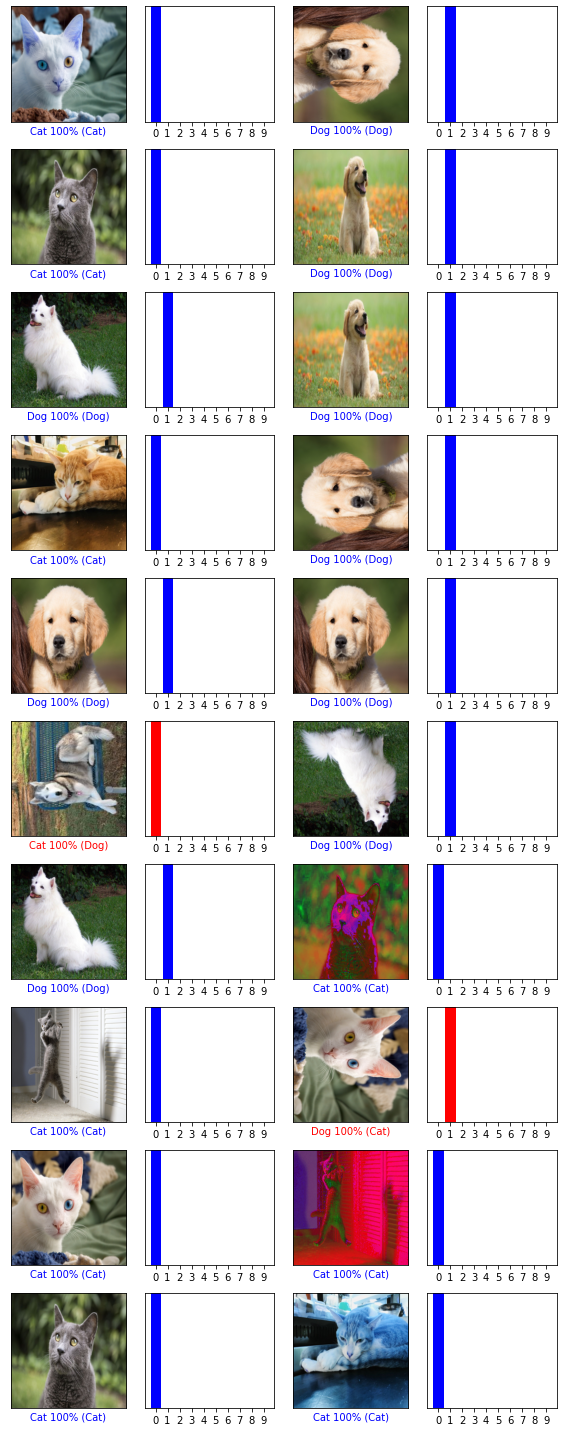

In [391]:

### Test result
predictions = probability_model.predict(test_images)
num_rows = int(test_images.shape[0] / 2)
num_cols = 2
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

### Conclusion
Small improvements. Training definatelly is better

# Problem 3 + 4
- Preparation of object detection dataset
- Data expansion for object detection dataset

### Description
Here, i will go through [https://albumentations.ai/docs/examples/example_bboxes/](https://albumentations.ai/docs/examples/example_bboxes/)

**So that we can see the use of bounding box plus image annotation with Albumentation**

# TODO